# Public And Private Data
#### Imported some required library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the data and concatinating both the data

In [3]:
private=pd.read_csv("../BRICS Development Indicators/PrivateSector_Data.csv",sep=';',error_bad_lines=False)
public=pd.read_csv("../BRICS Development Indicators/PublicSector_Indicators.csv",sep=';',error_bad_lines=False)

In [4]:
t=[private,public]
total=pd.concat(t)

In [5]:
total.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,11.895098
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,1970.0,NaN
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,1970.0,5.556494
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,1970.0,NaN
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,1970.0,NaN


In [6]:
total.shape

(123750, 6)

# Removing null Values


In [7]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123750 entries, 0 to 81499
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SeriesName   123450 non-null  object 
 1   SeriesCode   123250 non-null  object 
 2   CountryName  123250 non-null  object 
 3   CountryCode  123250 non-null  object 
 4   Year         123750 non-null  float64
 5   Value        44258 non-null   float64
dtypes: float64(2), object(4)
memory usage: 6.6+ MB


In [8]:
#dropping the rows containing null values
total.dropna(axis=0,inplace=True)

In [9]:
#after removing the null items we are left with 44258 rows
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44258 entries, 0 to 81494
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   44258 non-null  object 
 1   SeriesCode   44258 non-null  object 
 2   CountryName  44258 non-null  object 
 3   CountryCode  44258 non-null  object 
 4   Year         44258 non-null  float64
 5   Value        44258 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.4+ MB


In [10]:
#total['SeriesName'].unique()

# Fuel Exports and Imports
- Fuel export of India, China, Russia Federation and South Africa
- Fuel import of India, China, Russia Federation and South Africa

In [11]:
total[total.SeriesName.str.contains('Fuel',case='False')]['SeriesName'].unique()

array(['Fuel exports (% of merchandise exports)',
       'Fuel imports (% of merchandise imports)'], dtype=object)

In [12]:
fuel=total[total.SeriesName.str.contains('Fuel',case='False')]

In [13]:
fuel.sample(5)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
39939,Fuel exports (% of merchandise exports),TX.VAL.FUEL.ZS.UN,South Africa,ZAF,2017.0,12.641521
5299,Fuel imports (% of merchandise imports),TM.VAL.FUEL.ZS.UN,South Africa,ZAF,1976.0,0.396488
13747,Fuel imports (% of merchandise imports),TM.VAL.FUEL.ZS.UN,India,IND,1986.0,15.057381
22197,Fuel imports (% of merchandise imports),TM.VAL.FUEL.ZS.UN,India,IND,1996.0,29.532063
39943,Fuel imports (% of merchandise imports),TM.VAL.FUEL.ZS.UN,Russian Federation,RUS,2017.0,0.838408


In [14]:
fuel.shape

(396, 6)

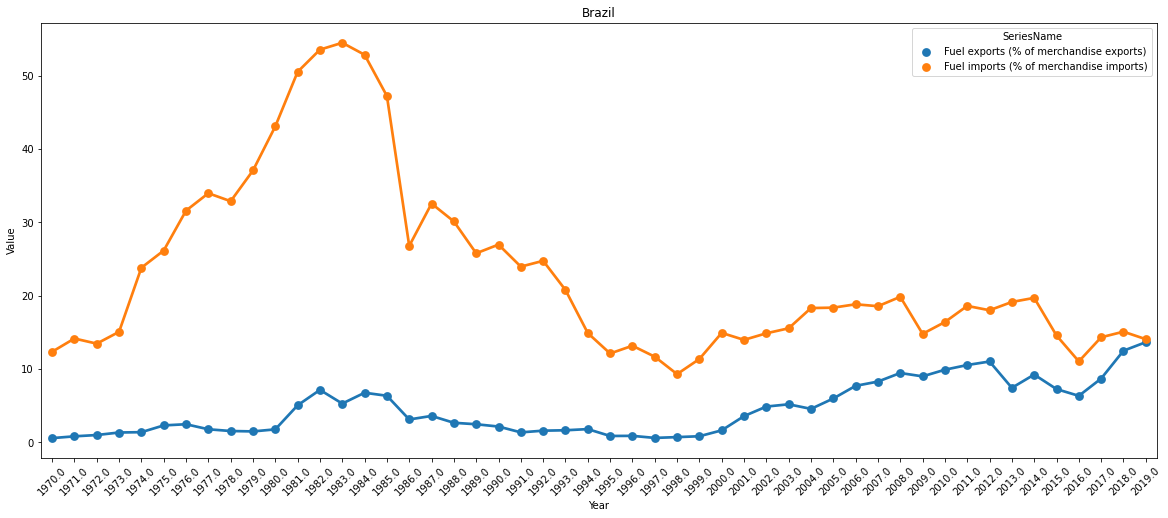

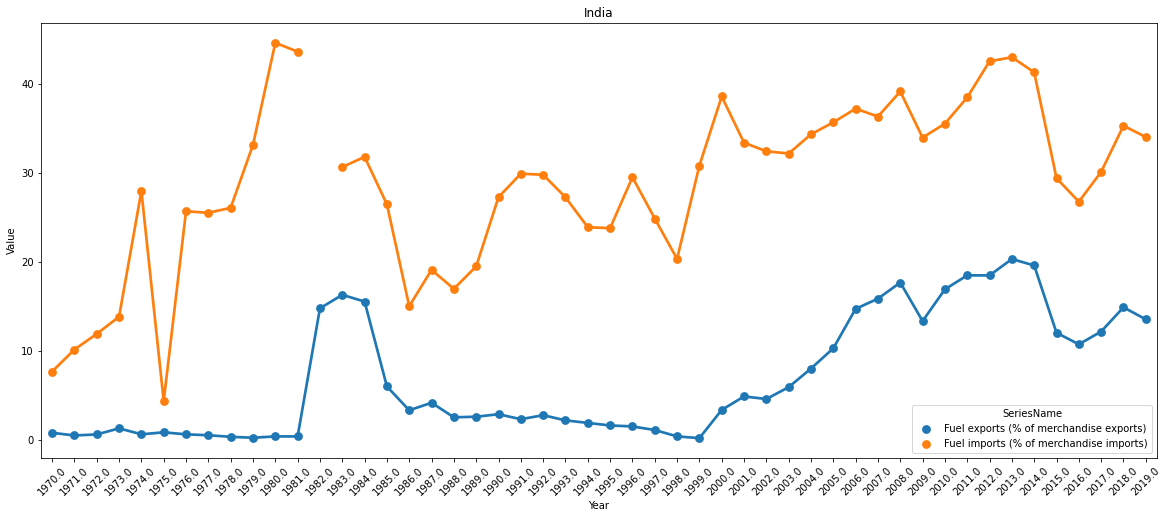

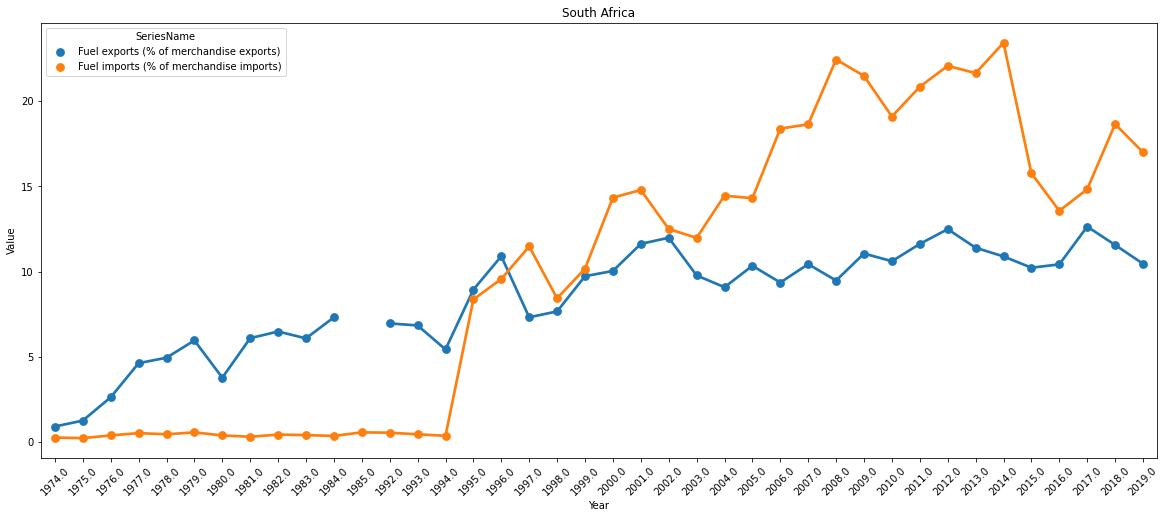

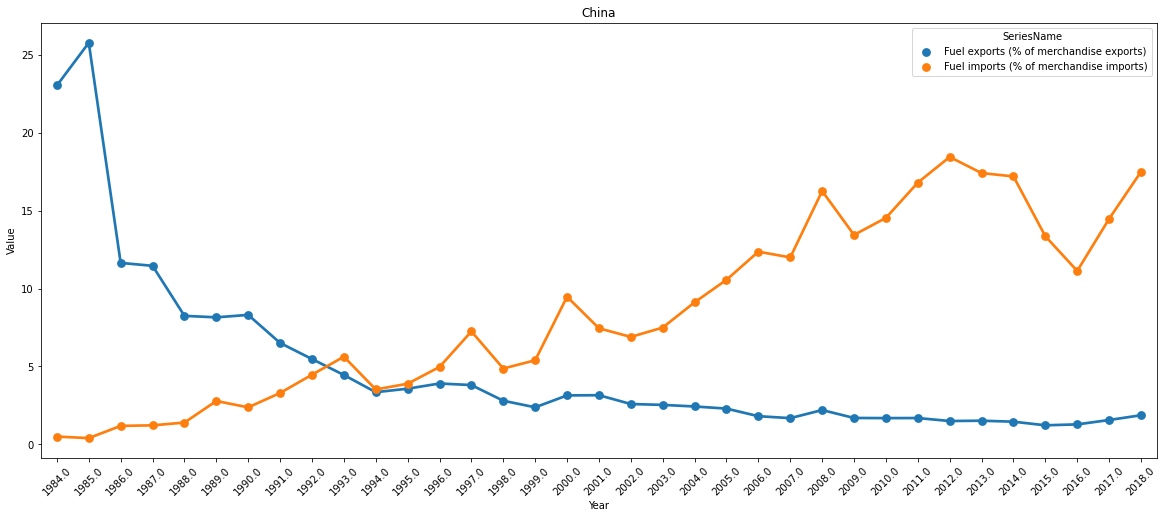

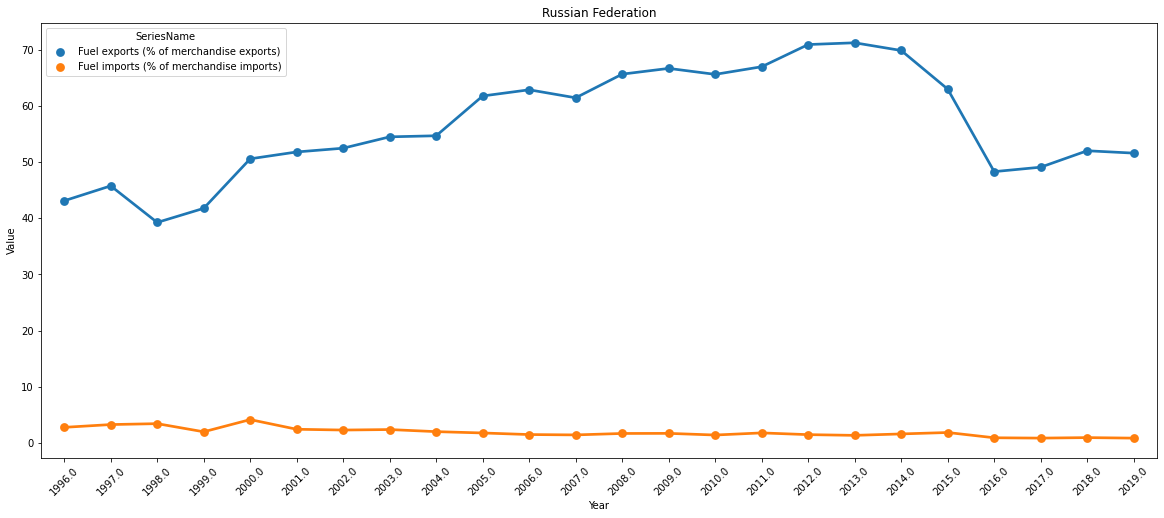

In [15]:
for country in fuel['CountryName'].unique():
    sap=fuel[fuel['CountryName']==country]
    plt.figure(figsize=(20,8))
    sns.pointplot(data=sap,x='Year',y='Value',hue='SeriesName').set_title(country)
    plt.xticks(rotation=45)
    plt.show()

# % Of commercial services (Imports and Exports)
- Computer, communications and other services
- Insurance and financial services
- Transport services
- Travel services

In [16]:
total[total.SeriesName.str.contains('% of commercial service',case='False')]['SeriesName'].unique()

array(['Computer, communications and other services (% of commercial service exports)',
       'Computer, communications and other services (% of commercial service imports)',
       'Insurance and financial services (% of commercial service exports)',
       'Insurance and financial services (% of commercial service imports)',
       'Transport services (% of commercial service exports)',
       'Transport services (% of commercial service imports)',
       'Travel services (% of commercial service exports)',
       'Travel services (% of commercial service imports)'], dtype=object)

In [17]:
cs=total[total.SeriesName.str.contains('% of commercial service',case='False')]

In [18]:
cs.shape

(1632, 6)

In [19]:
cs['Exp/Imp']=cs['SeriesName'].apply(lambda x: 'Export' if 'exports' in x else('Import' if 'imports' in x else 'NA'))

In [20]:
cs.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Exp/Imp
74,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,South Africa,ZAF,1970.0,10.243902,Export
79,"Computer, communications and other services (%...",TM.VAL.OTHR.ZS.WT,South Africa,ZAF,1970.0,19.930070,Import
254,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,South Africa,ZAF,1970.0,11.463415,Export
259,Insurance and financial services (% of commerc...,TM.VAL.INSF.ZS.WT,South Africa,ZAF,1970.0,11.013986,Import
819,Transport services (% of commercial service ex...,TX.VAL.TRAN.ZS.WT,South Africa,ZAF,1970.0,20.487805,Export


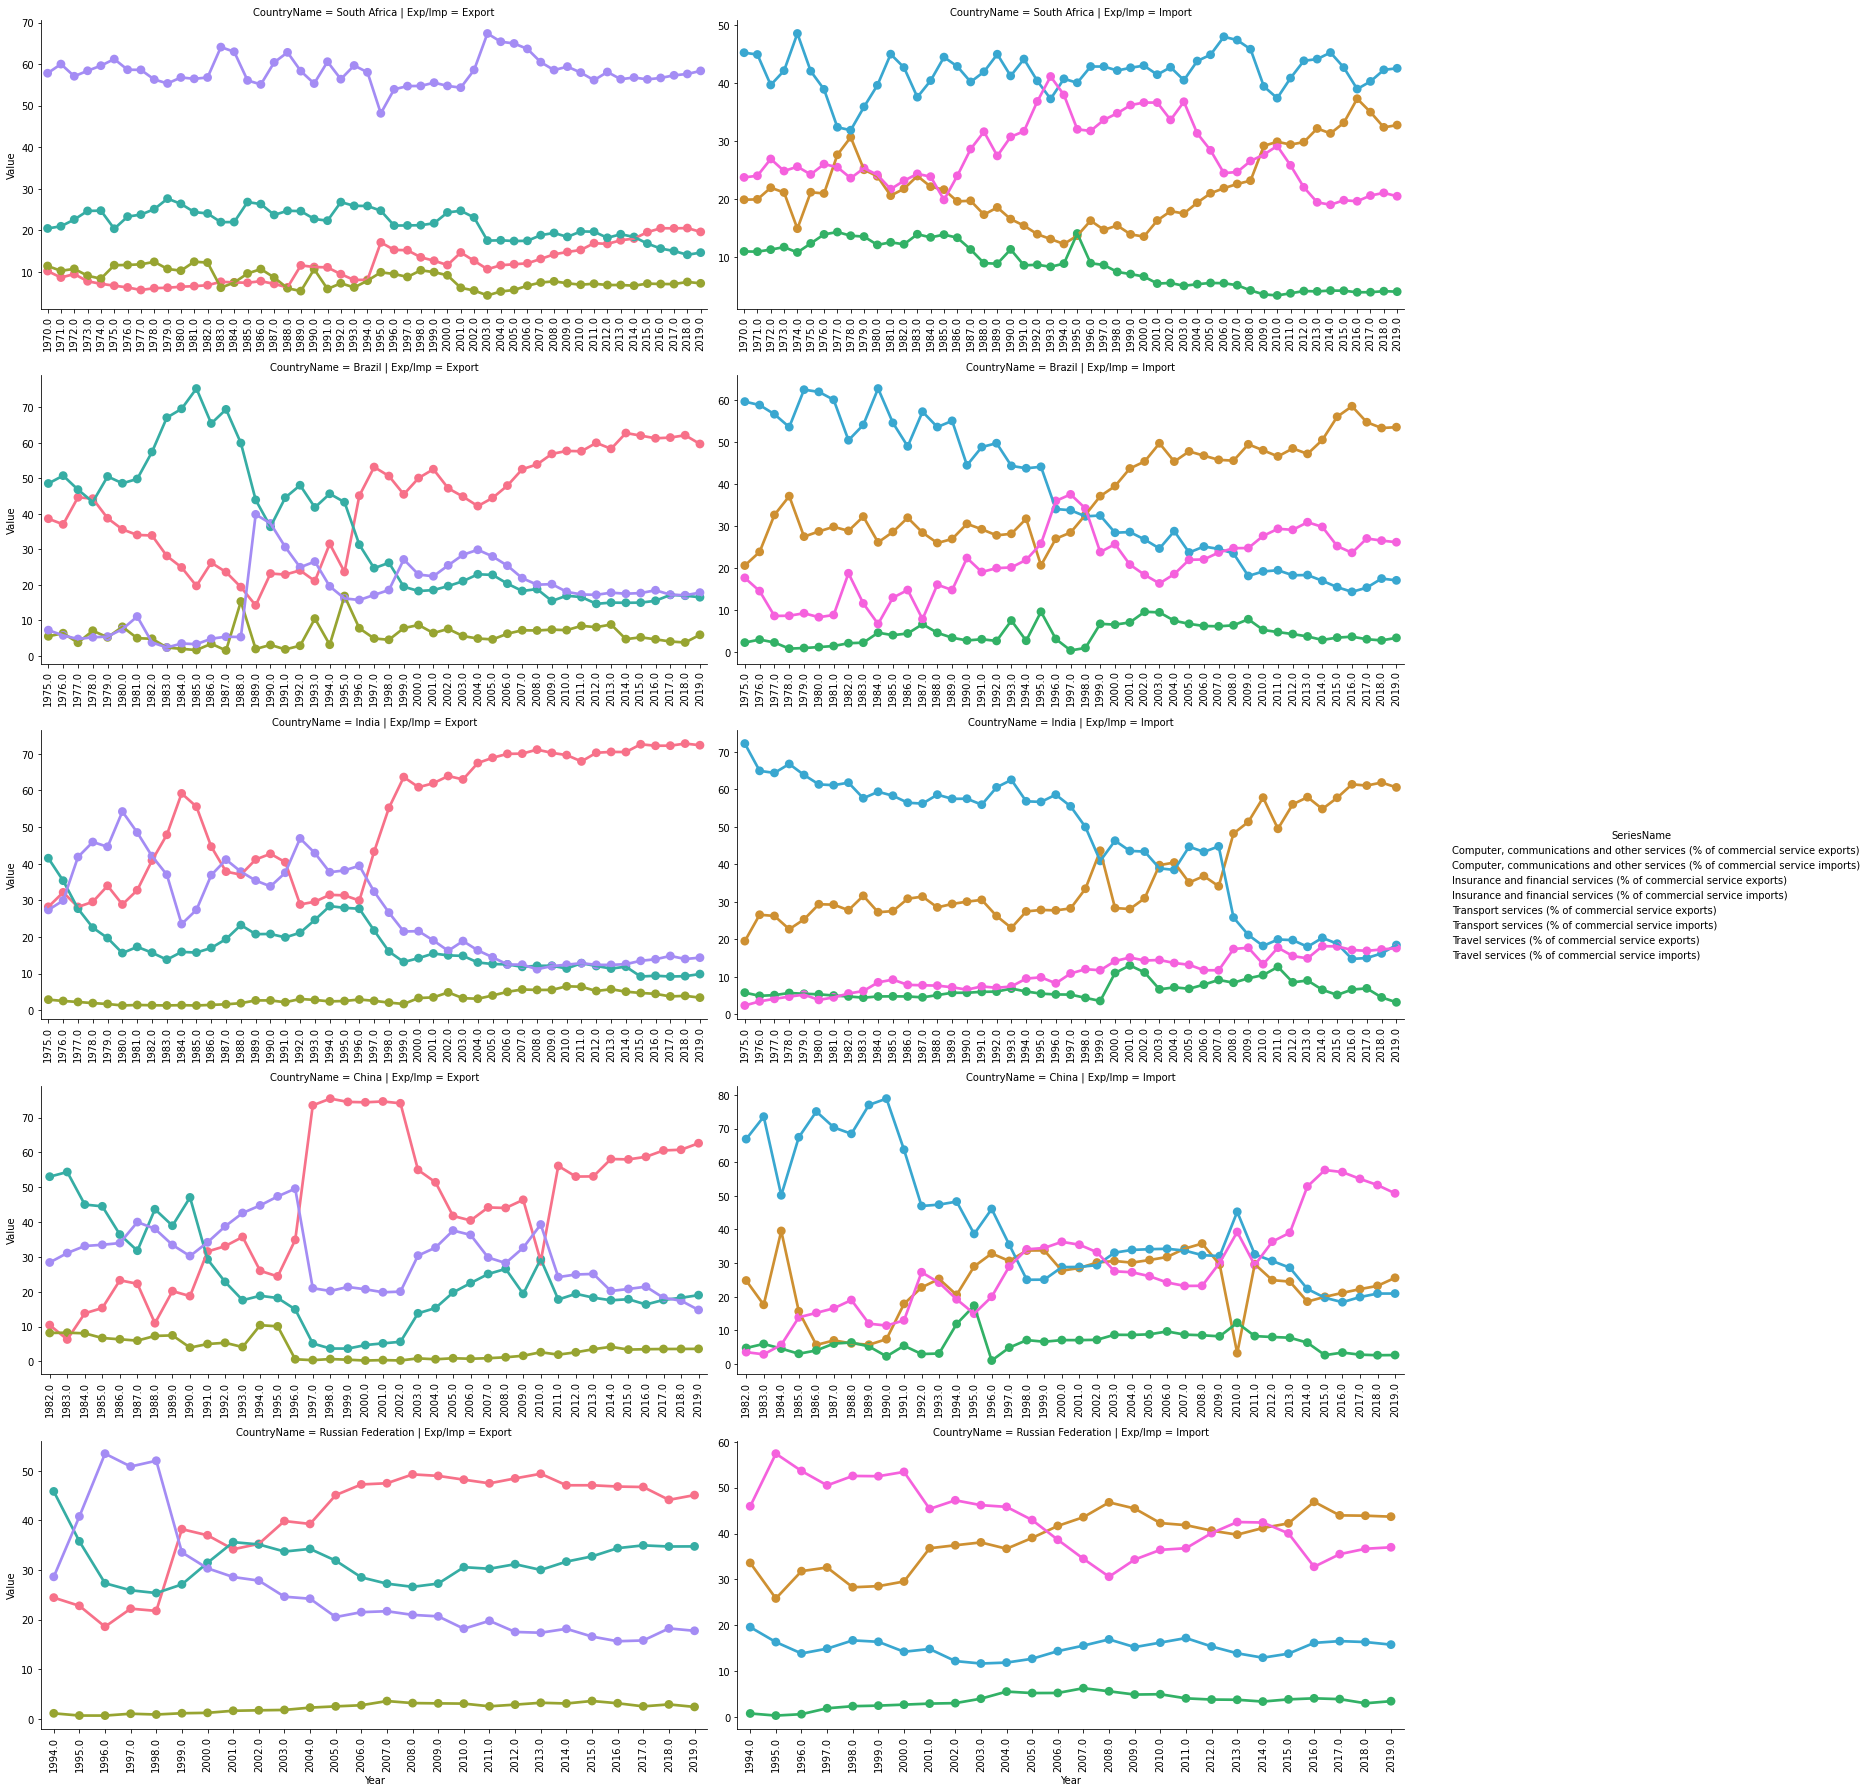

In [21]:
sns.set_palette('crest')
g = sns.FacetGrid(data=cs, col='Exp/Imp',row='CountryName',hue='SeriesName',
                  sharex=False, sharey=False, height=5, aspect=2)
g.map(sns.pointplot, 'Year', 'Value')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()
plt.show()

# International Tourism
- Arrivals
- Departures

In [22]:
total[total.SeriesName.str.contains('International tourism, number of arrivals|International tourism, number of departures',case='False')]['SeriesName'].unique()

array(['International tourism, number of arrivals',
       'International tourism, number of departures'], dtype=object)

In [23]:
ia=total[total.SeriesName.str.contains('International tourism, number of arrivals|International tourism, number of departures',case='False')]

In [24]:
ia.shape

(216, 6)

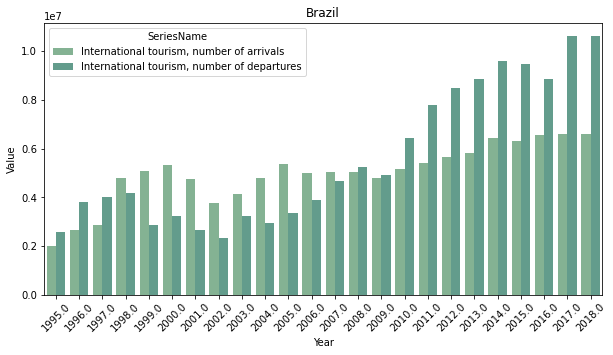

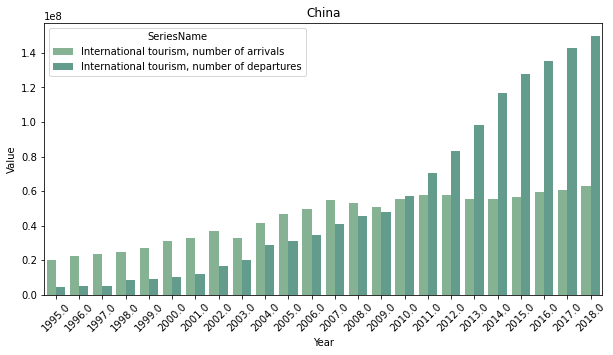

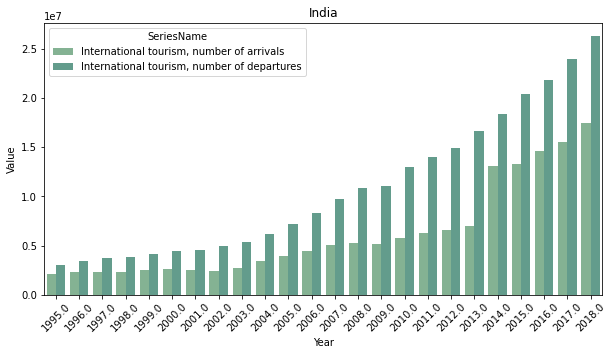

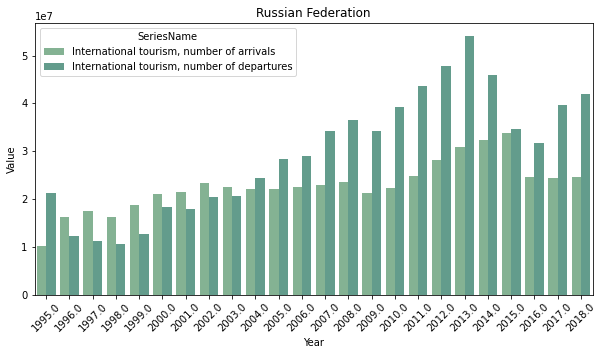

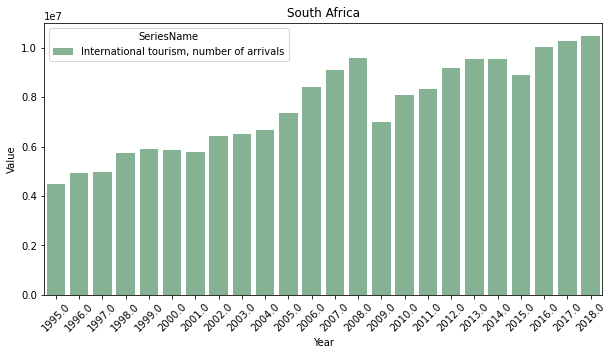

In [25]:
for country in ia['CountryName'].unique():
    sap=ia[ia['CountryName']==country]
    plt.figure(figsize=(10,5))
    sns.barplot(data=sap,x='Year',y='Value',hue='SeriesName').set_title(country)
    plt.xticks(rotation=45)
    plt.show()

# MIlitary Expenditure (% of GDP)

In [26]:
total[total.SeriesName.str.contains('Military expenditure',case='False')]['SeriesName'].unique()

array(['Military expenditure (% of GDP)',
       'Military expenditure (current LCU)',
       'Military expenditure (current USD)',
       'Military expenditure (% of general government expenditure)'],
      dtype=object)

In [27]:
k=total[total.SeriesName.str.contains('Military expenditure',case='False')]

In [28]:
mil=total[total.SeriesName=='Military expenditure (% of GDP)']

In [29]:
mil.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
1030,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,Brazil,BRA,1970.0,2.887290
1032,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,India,IND,1970.0,3.185183
1034,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,South Africa,ZAF,1970.0,2.333745
2660,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,Brazil,BRA,1971.0,2.619047
2662,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,India,IND,1971.0,3.652454


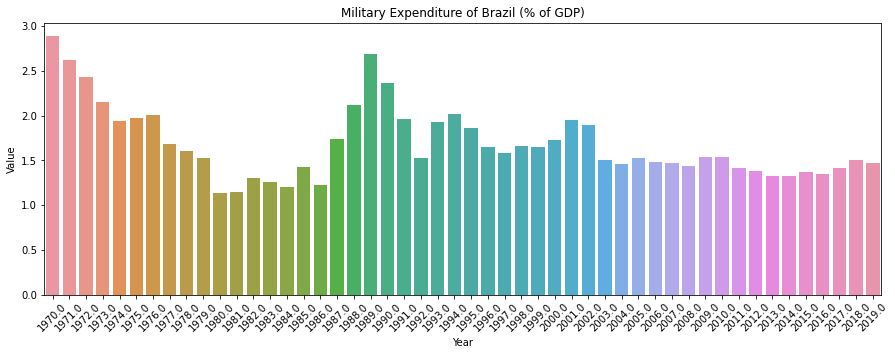

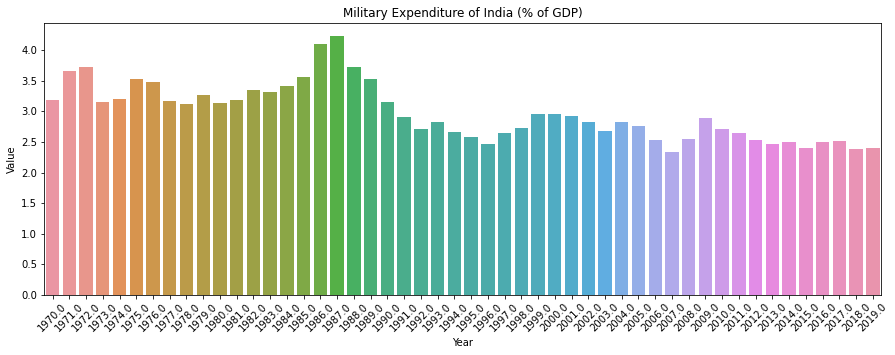

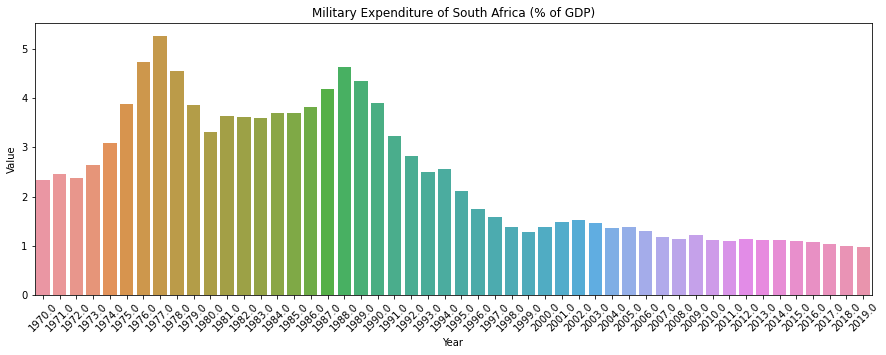

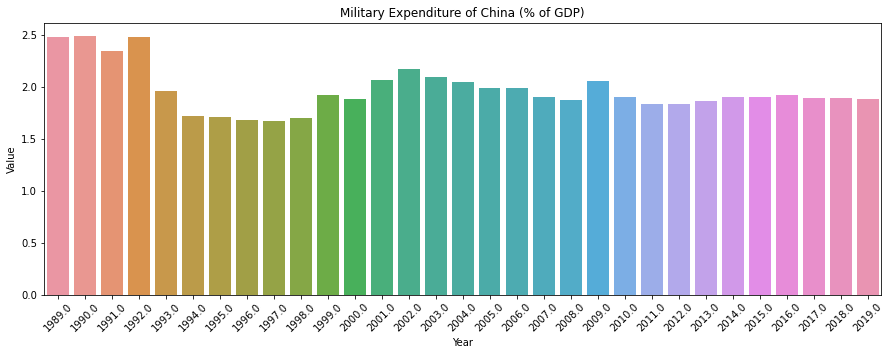

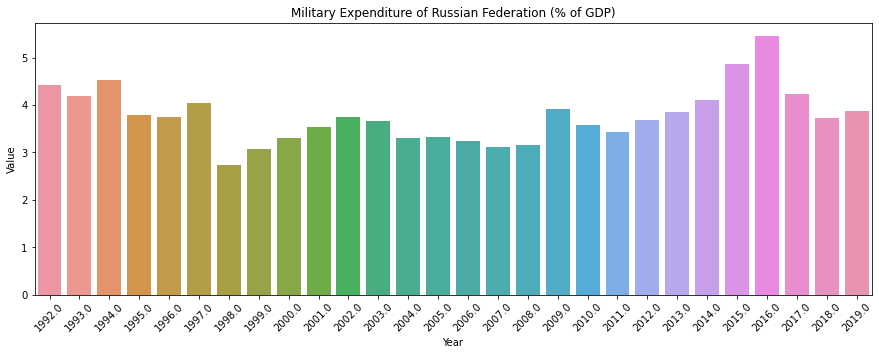

In [30]:
for country in mil['CountryName'].unique():
    sap=mil[mil['CountryName']==country]
    plt.figure(figsize=(15,5))
    sns.barplot(data=sap,x='Year',y='Value').set_title(f"Military Expenditure of {country} (% of GDP)")
    plt.xticks(rotation=45)
    plt.show()

# Refugee Population by-
- County or teritory of asylum
- County or teritory of origin

In [31]:
total[total.SeriesName.str.contains('Refugee population by country or territory of',case='False')]['SeriesName'].unique()

array(['Refugee population by country or territory of asylum',
       'Refugee population by country or territory of origin'],
      dtype=object)

In [32]:
refugee=total[total.SeriesName.str.contains('Refugee population by country or territory of',case='False')]

In [33]:
refugee.shape

(400, 6)

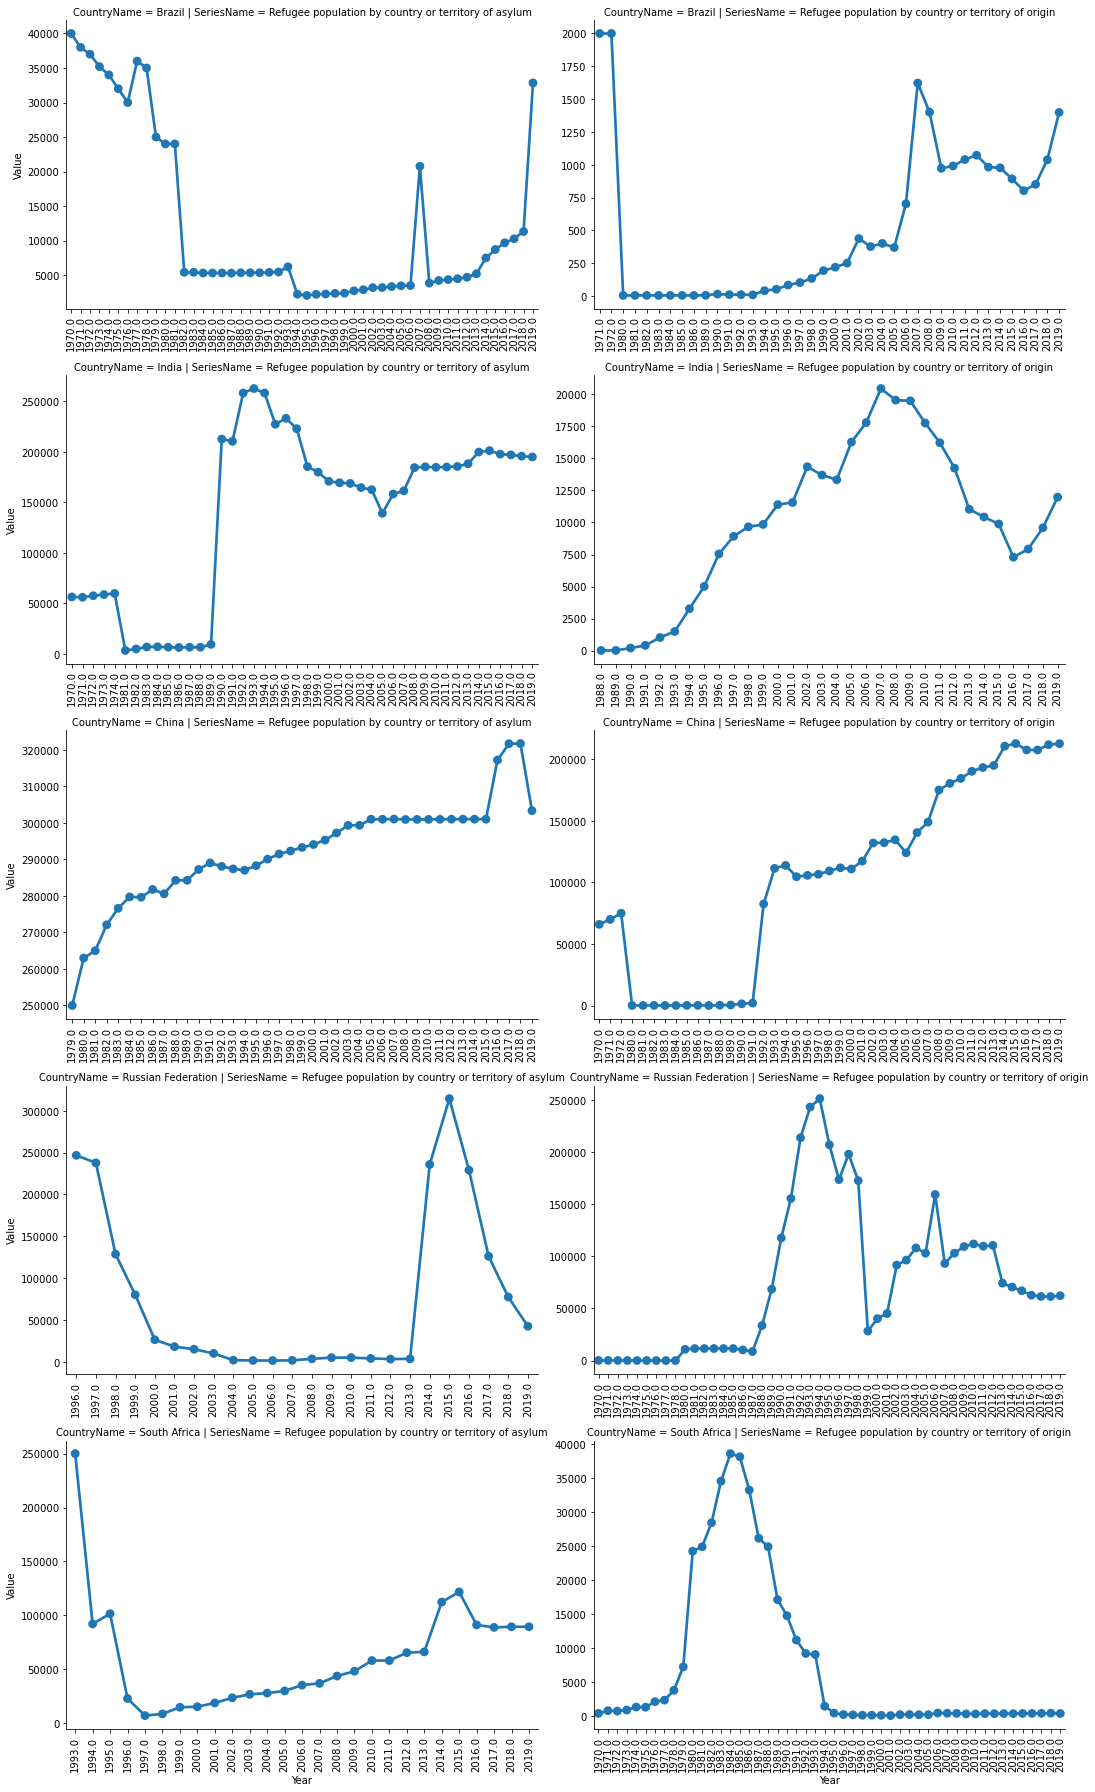

In [34]:
sns.set_palette('tab10')
g = sns.FacetGrid(data=refugee, col='SeriesName',row='CountryName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.pointplot, 'Year', 'Value')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()
plt.show()

# Labour force participation
- for % of male 
- for % of female

In [35]:
total[total.SeriesName.str.contains('Labor force participation rate for ages',case='False')]['SeriesName'].unique()

array(['Labor force participation rate for ages 15-24, female (%) (national estimate)',
       'Labor force participation rate for ages 15-24, male (%) (national estimate)',
       'Labor force participation rate for ages 15-24, total (%) (national estimate)',
       'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)',
       'Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)',
       'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)'],
      dtype=object)

In [36]:
labour=total[(total.SeriesName=='Labor force participation rate for ages 15-24, female (%) (national estimate)')|(total.SeriesName=="Labor force participation rate for ages 15-24, male (%) (national estimate)")]

In [37]:
labour['Sex']=labour['SeriesName'].apply(lambda x: 'Female' if 'female' in x else('Male' if 'male' in x else 'NA'))
labour.sample(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex
80775,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.MA.NE.ZS,Brazil,BRA,2019.0,61.523102,Male
70995,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.MA.NE.ZS,Brazil,BRA,2013.0,62.744099,Male
74248,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.FE.NE.ZS,Russian Federation,RUS,2015.0,33.799198,Female
77509,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.FE.NE.ZS,South Africa,ZAF,2017.0,24.176800,Female
44909,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.FE.NE.ZS,South Africa,ZAF,1997.0,17.299999,Female
46538,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.FE.NE.ZS,Russian Federation,RUS,1998.0,37.551998,Female
69367,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.MA.NE.ZS,India,IND,2012.0,48.596500,Male
41645,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.FE.NE.ZS,Brazil,BRA,1995.0,49.373199,Female
54685,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.FE.NE.ZS,Brazil,BRA,2003.0,52.315800,Female
51435,"Labor force participation rate for ages 15-24,...",SL.TLF.ACTI.1524.MA.NE.ZS,Brazil,BRA,2001.0,72.254799,Male


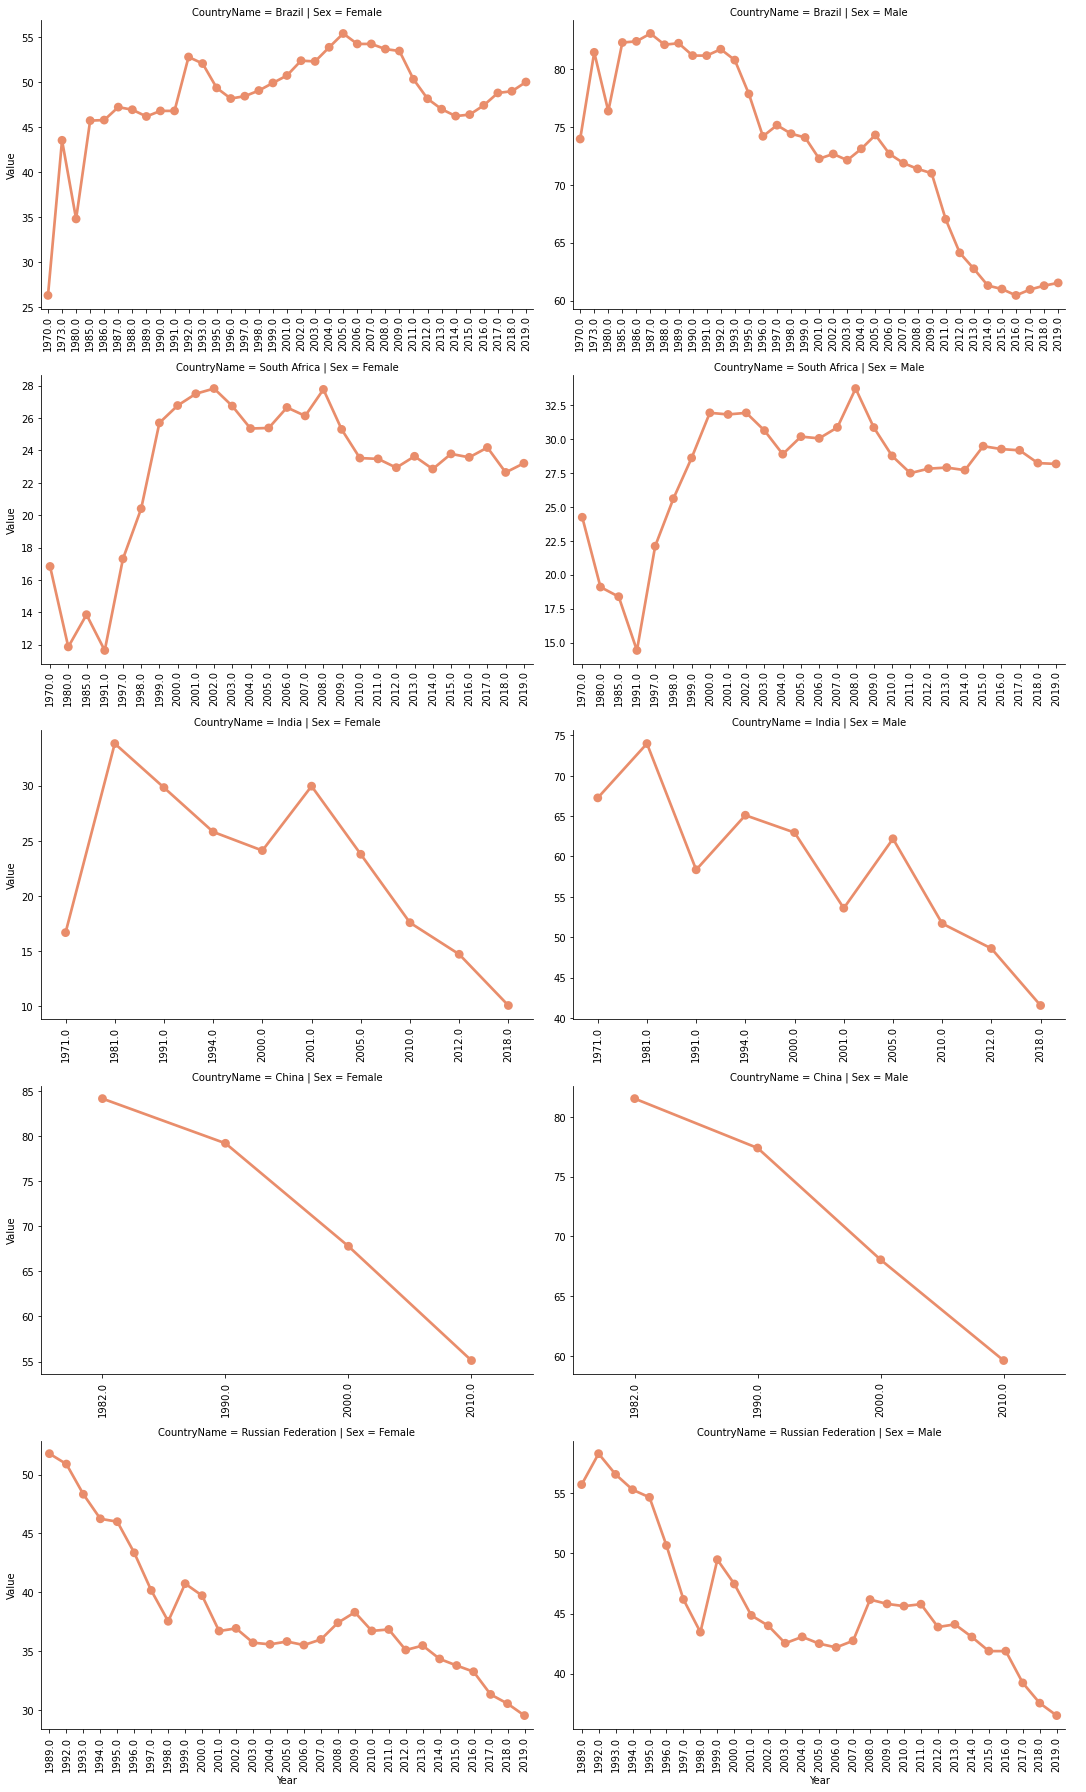

In [38]:
sns.set_palette('flare')
g = sns.FacetGrid(data=labour, col='Sex',row='CountryName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.pointplot, 'Year', 'Value')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()
plt.show()

# Subscription (per 100 people)
- Fixed Telephone 
- Mobile Cellular
- Fixed boradband

In [39]:
total[total.SeriesName.str.contains('Mobile cellular subscription'and'per 100 people',case='False')]['SeriesName'].unique()

array(['Fixed telephone subscriptions (per 100 people)',
       'Mobile cellular subscriptions (per 100 people)',
       'Fixed broadband subscriptions (per 100 people)'], dtype=object)

In [40]:
network_subs=total[(total.SeriesName.str.contains('Mobile cellular subscription'and'per 100 people',case='False'))&(total['Year']%10==0)]
network_subs.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
655,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2,Brazil,BRA,1970.0,1.314223
657,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2,India,IND,1970.0,0.176760
659,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2,South Africa,ZAF,1970.0,4.150473
1055,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,Brazil,BRA,1970.0,0.000000
1056,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,China,CHN,1970.0,0.000000


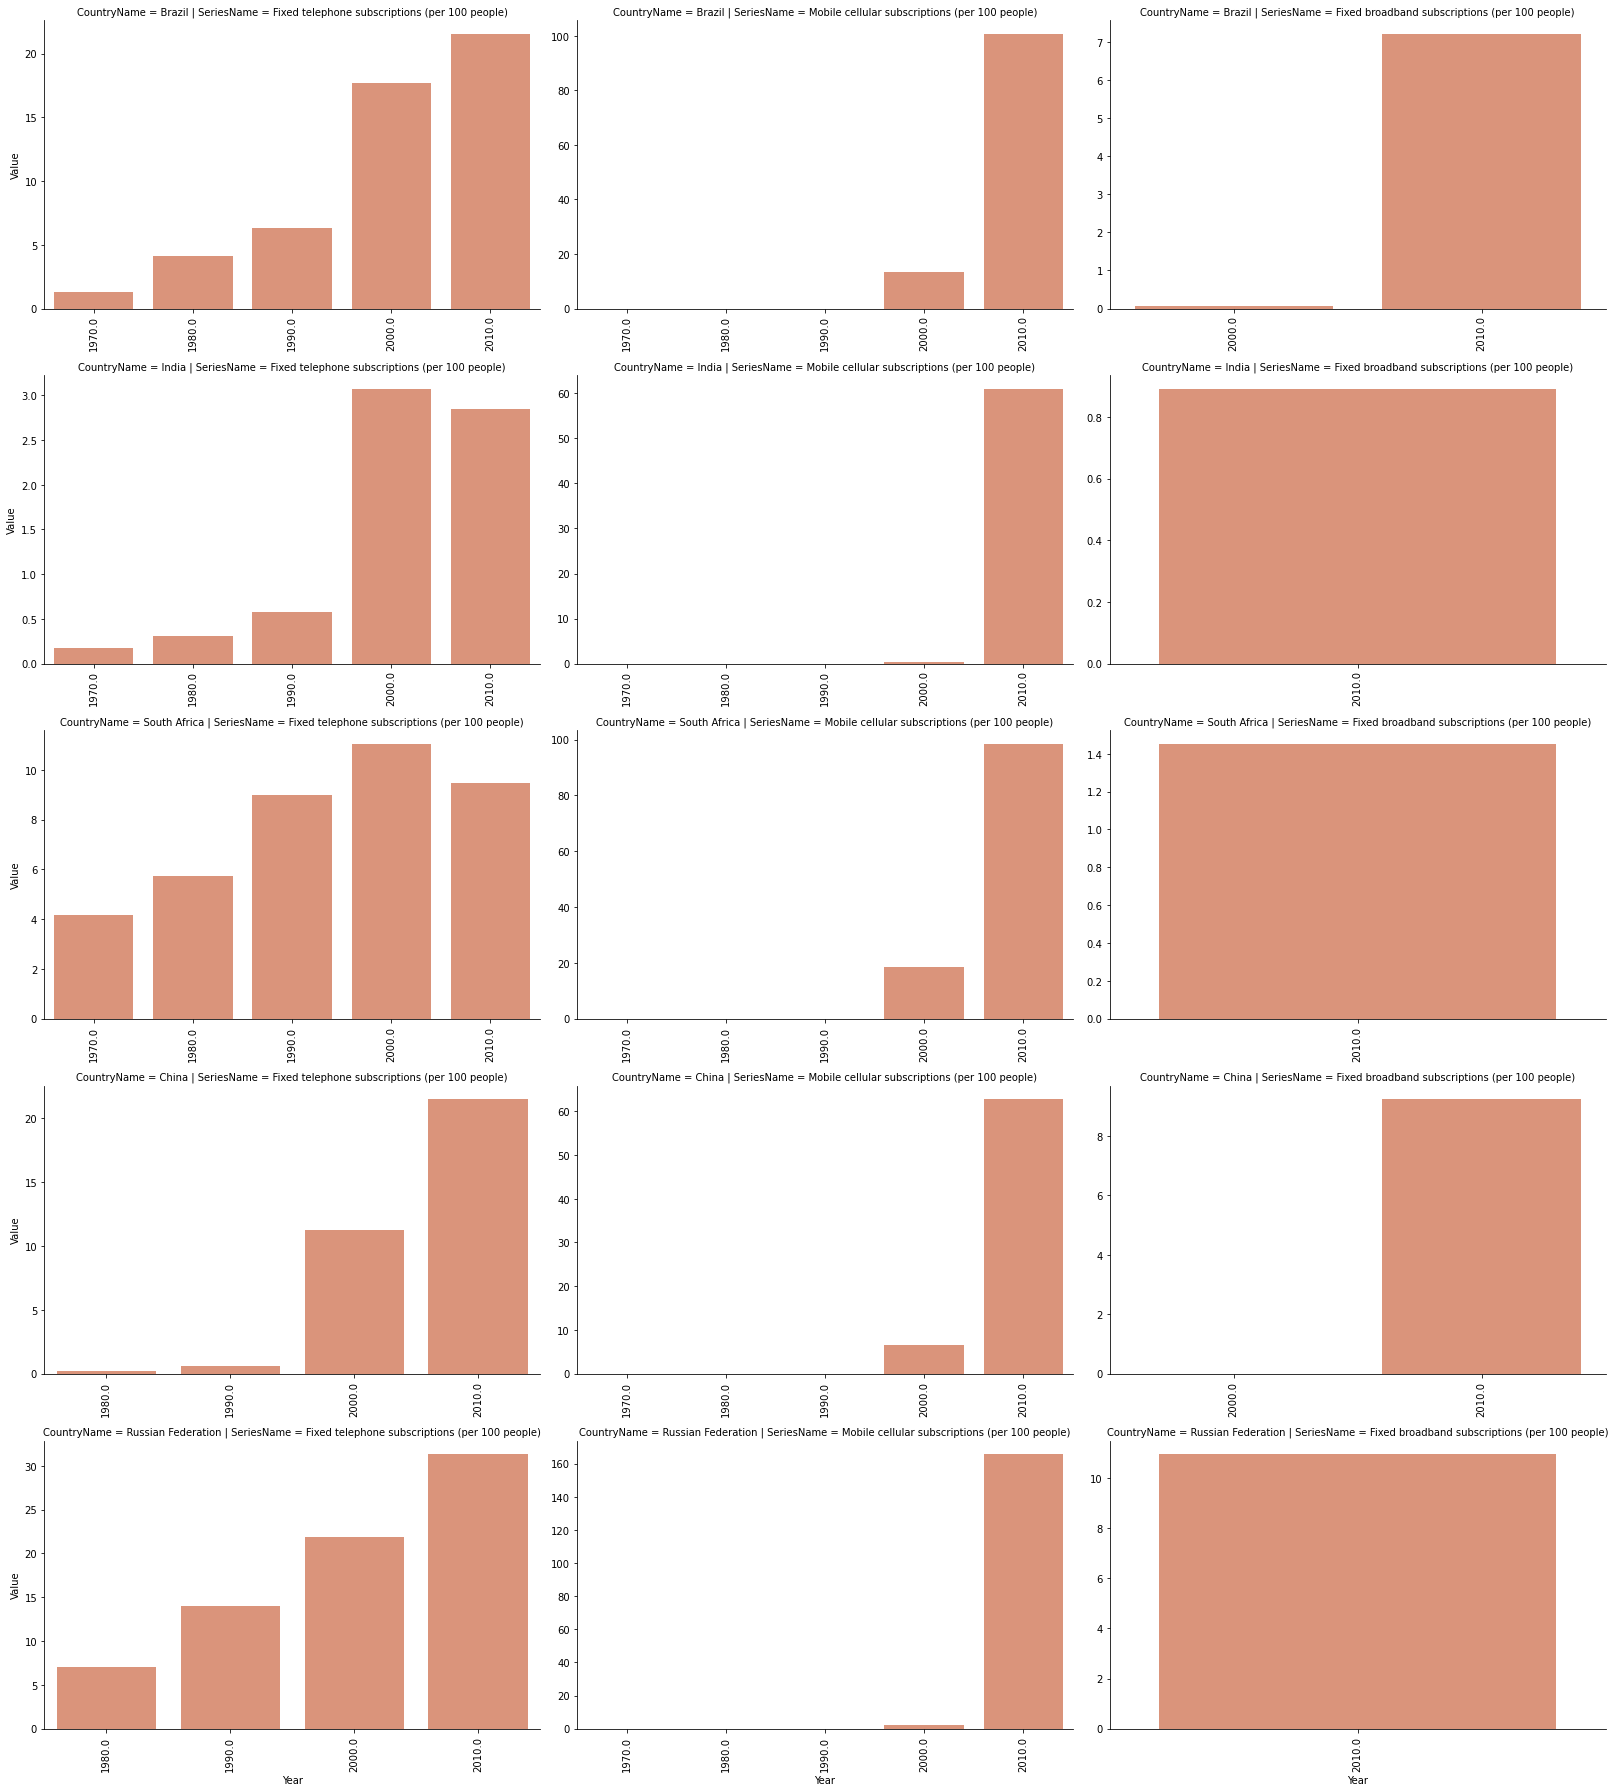

In [41]:
sns.set_palette('flare')
g = sns.FacetGrid(data=network_subs, row='CountryName',col='SeriesName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, 'Year', 'Value')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
plt.show()

# Employment (% of total employment) (modeled ILO estimate)
- Agriculture
- Industry
- Services

In [42]:
total[total.SeriesName.str.contains('Employment in',case='False')]['SeriesName'].unique()

array(['Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in agriculture, female (% of female employment) (modeled ILO estimate)',
       'Employment in agriculture, male (% of male employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in industry, female (% of female employment) (modeled ILO estimate)',
       'Employment in industry, male (% of male employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Employment in services, female (% of female employment) (modeled ILO estimate)',
       'Employment in services, male (% of male employment) (modeled ILO estimate)'],
      dtype=object)

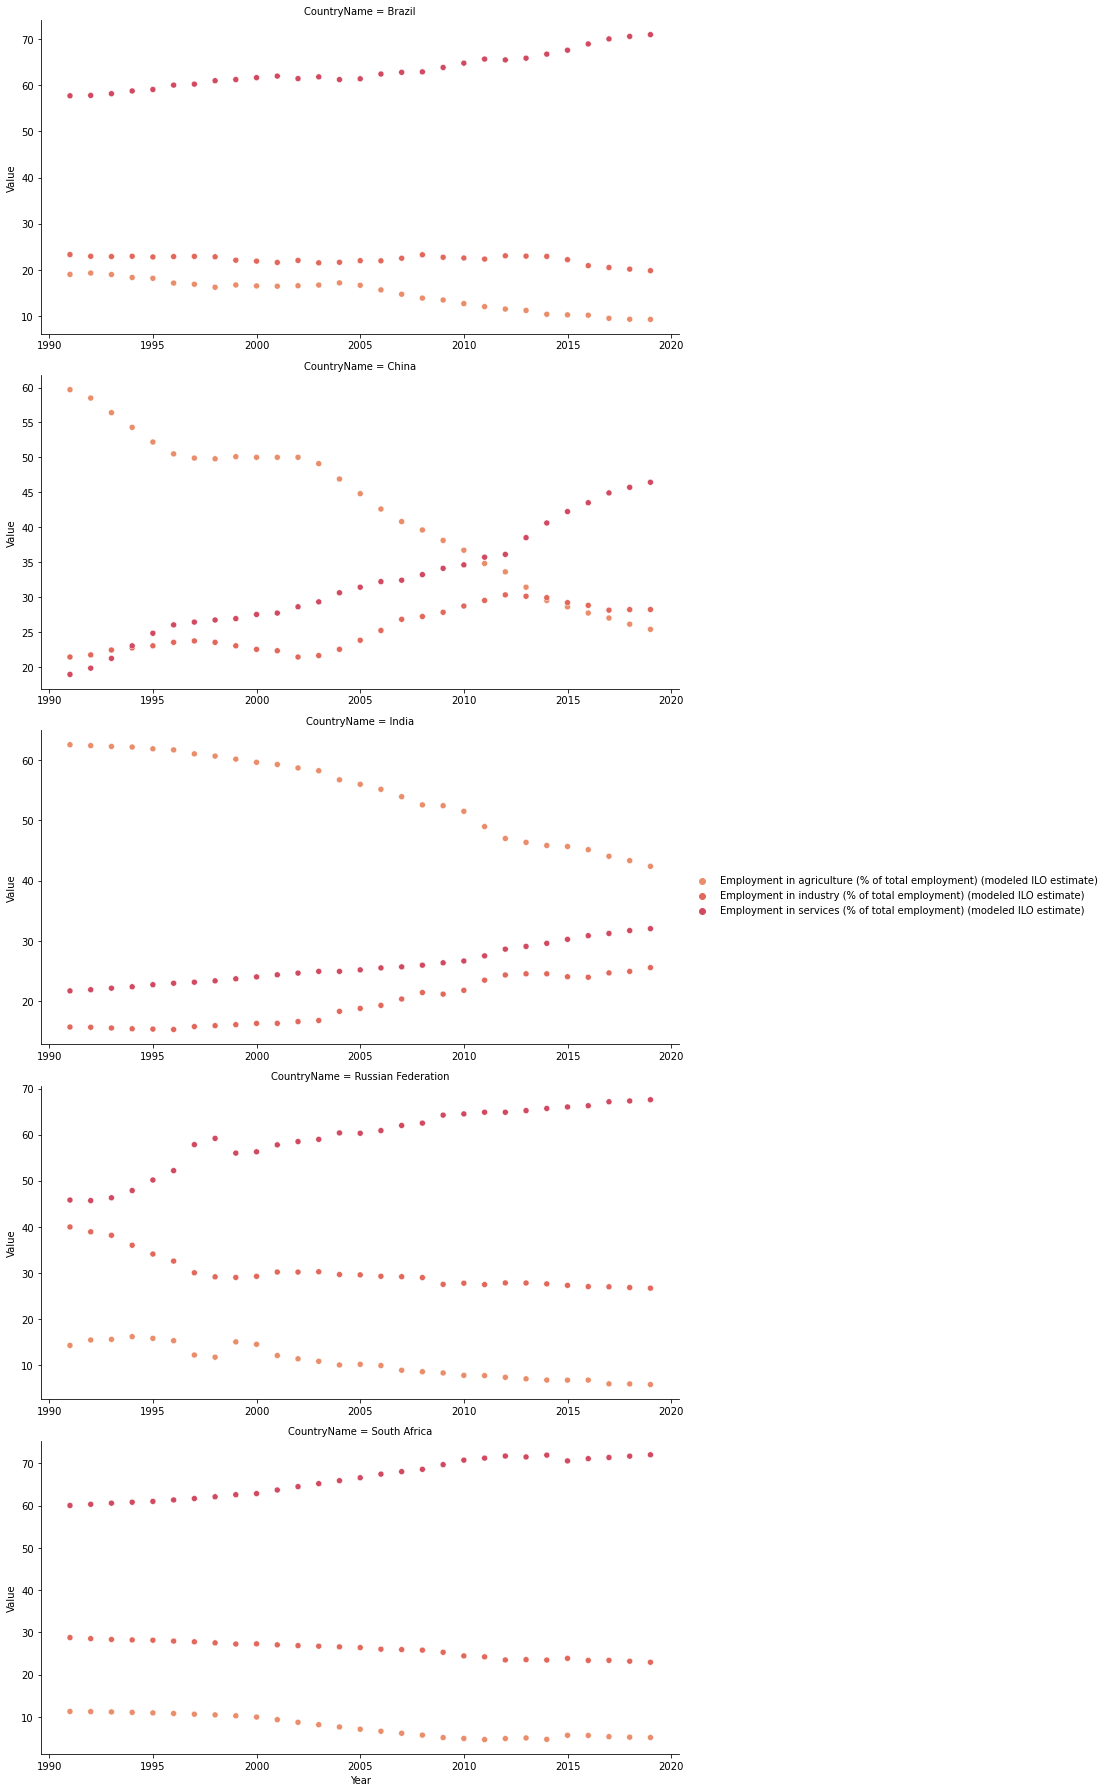

In [43]:
employ_field=['Employment in agriculture (% of total employment) (modeled ILO estimate)',
              'Employment in industry (% of total employment) (modeled ILO estimate)',
              'Employment in services (% of total employment) (modeled ILO estimate)']
a = total[total['SeriesName'].isin(employ_field)]
g = sns.FacetGrid(data=a,row='CountryName',sharex=False, sharey=False, height=5, aspect=2)
g.map(sns.scatterplot, 'Year', 'Value','SeriesName')
g.fig.tight_layout()
g.add_legend()
plt.show()

# Unemployment (% of total labor force)
- Advance education
- Basic education
- Intermediate education

In [44]:
total[total.SeriesName.str.contains('Unemployment with',case='False')]['SeriesName'].unique()

array(['Unemployment with advanced education (% of total labor force with advanced education)',
       'Unemployment with advanced education, female (% of female labor force with advanced education)',
       'Unemployment with advanced education, male (% of male labor force with advanced education)',
       'Unemployment with basic education (% of total labor force with basic education)',
       'Unemployment with basic education, female (% of female labor force with basic education)',
       'Unemployment with basic education, male (% of male labor force with basic education)',
       'Unemployment with intermediate education (% of total labor force with intermediate education)',
       'Unemployment with intermediate education, female (% of female labor force with intermediate education)',
       'Unemployment with intermediate education, male (% of male labor force with intermediate education)'],
      dtype=object)

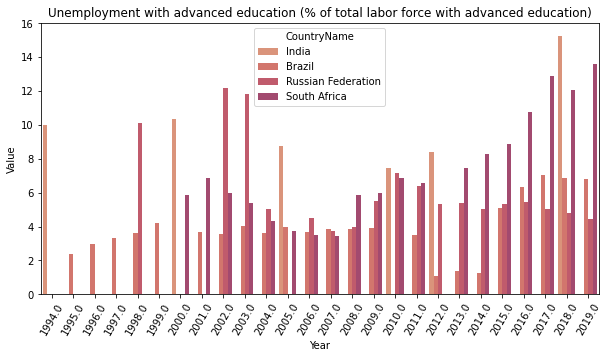

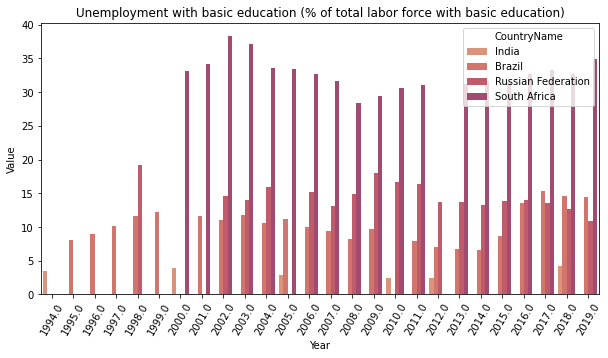

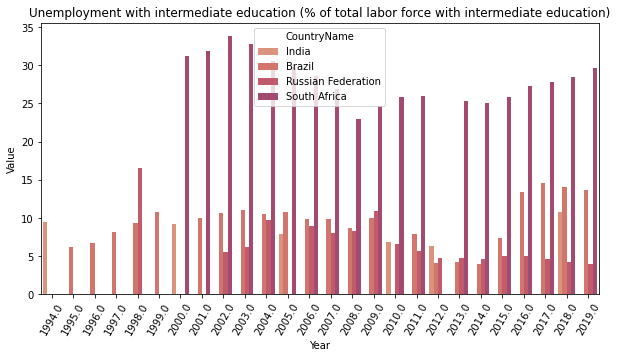

In [45]:
unemployed_educated=['Unemployment with advanced education (% of total labor force with advanced education)',
                     'Unemployment with basic education (% of total labor force with basic education)',
                     'Unemployment with intermediate education (% of total labor force with intermediate education)']
for i, series in enumerate(unemployed_educated):
    a = total[total.SeriesName==series]
    plt.figure(figsize=(10,5))
    sns.barplot(data=a, x='Year', y='Value',hue='CountryName').set_title(f'{series}')
    plt.xticks(rotation=60)
    

##### No data available of china for unemployment

# Children in employment 
- female
- male
- self-employed
- study and work
- total
- unpaid
- wage family workers
- work only

In [46]:
total[total.SeriesName.str.contains('Children in employment',case='False')]['SeriesName'].unique()

array(['Children in employment, female (% of female children ages 7-14)',
       'Children in employment, male (% of male children ages 7-14)',
       'Children in employment, self-employed (% of children in employment, ages 7-14)',
       'Children in employment, self-employed, female (% of female children in employment, ages 7-14)',
       'Children in employment, self-employed, male (% of male children in employment, ages 7-14)',
       'Children in employment, study and work (% of children in employment, ages 7-14)',
       'Children in employment, study and work, female (% of female children in employment, ages 7-14)',
       'Children in employment, study and work, male (% of male children in employment, ages 7-14)',
       'Children in employment, total (% of children ages 7-14)',
       'Children in employment, unpaid family workers (% of children in employment, ages 7-14)',
       'Children in employment, unpaid family workers, female (% of female children in employment, ages 

In [47]:
employed_kids=total[total.SeriesName.str.contains('Children in employment',case='False')]
employed_kids.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
47454,"Children in employment, female (% of female ch...",SL.TLF.0714.FE.ZS,South Africa,ZAF,1999.0,26.40
47459,"Children in employment, male (% of male childr...",SL.TLF.0714.MA.ZS,South Africa,ZAF,1999.0,29.00
47464,"Children in employment, self-employed (% of ch...",SL.SLF.0714.ZS,South Africa,ZAF,1999.0,7.10
47469,"Children in employment, self-employed, female ...",SL.SLF.0714.FE.ZS,South Africa,ZAF,1999.0,8.72
47474,"Children in employment, self-employed, male (%...",SL.SLF.0714.MA.ZS,South Africa,ZAF,1999.0,5.62


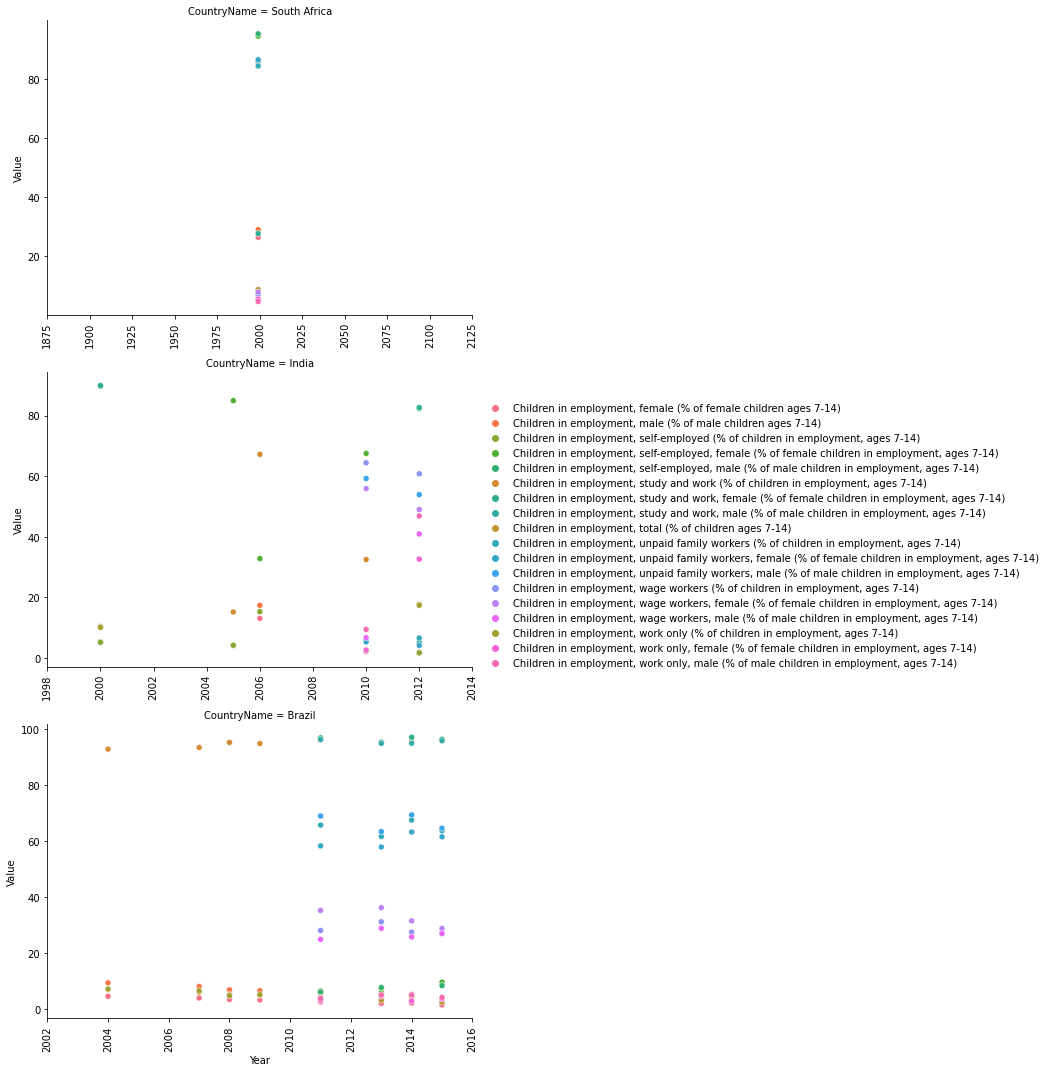

In [48]:
sns.set_palette('crest')
g = sns.FacetGrid(data=employed_kids,row='CountryName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.scatterplot, 'Year', 'Value','SeriesName')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()
plt.show()

# Merchandise Import and Export

- Merchandise exports (current US$)

- Merchandise exports by the reporting economy (current US$)

- Merchandise imports (current US$)

- Merchandise imports by the reporting economy (current US$)

In [49]:
#total[total.SeriesName.str.contains('Merchandise',case='False')]['SeriesName'].unique()

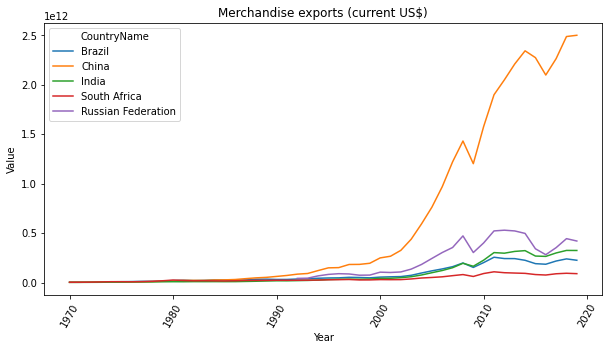

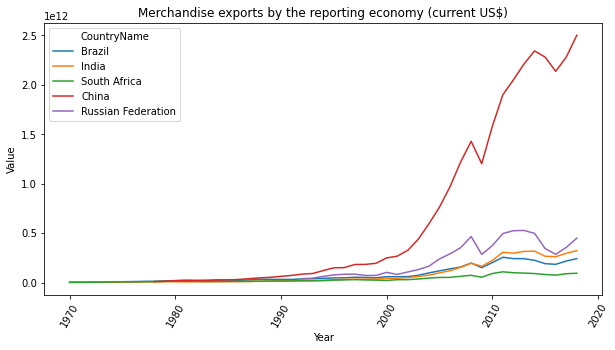

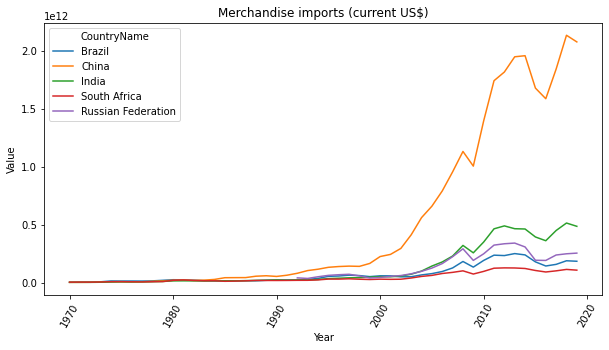

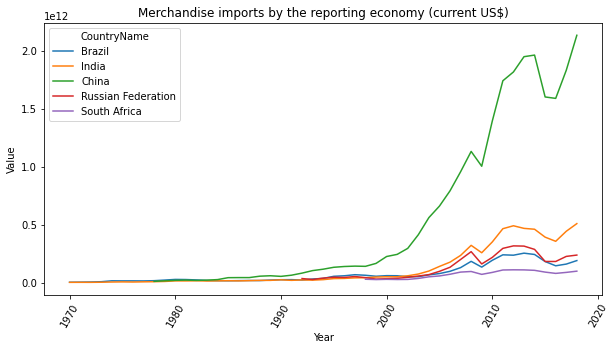

In [50]:
sns.set_palette('tab10')
merchandise=['Merchandise exports (current US$)',
             'Merchandise exports by the reporting economy (current US$)',
             'Merchandise imports (current US$)',
             'Merchandise imports by the reporting economy (current US$)',
            ]
for i, series in enumerate(merchandise):
    a = total[total.SeriesName==series]
    plt.figure(figsize=(10,5))
    sns.lineplot(data=a, x='Year', y='Value',hue='CountryName').set_title(f'{series}')
    plt.xticks(rotation=60)